# [Taller 5] Minimos Cuadrados

Interpola los siguientes puntos:

- **p₁** = (5.4, 3.2)
- **p₂ᵢ** = (9.5, 0.7)
- **p₃** = (12.3, -3.6)

> De estos, el punto **p₂ᵢ** debe ser seleccionable y movible.

**Crea un programa que interpole una parábola en tiempo real para los tres puntos.**

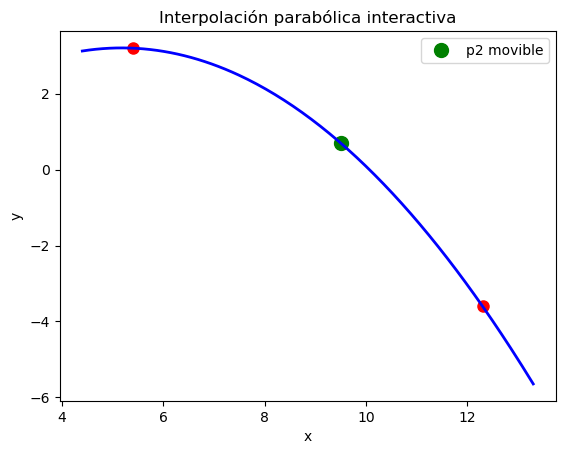

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos iniciales
p1 = [5.4, 3.2]
p2 = [9.5, 0.7]
p3 = [12.3, -3.6]

fig, ax = plt.subplots()
plt.title("Interpolación parabólica interactiva")
plt.xlabel("x")
plt.ylabel("y")

# Dibujar p1 y p3 (no movibles)
ax.plot([p1[0], p3[0]], [p1[1], p3[1]], 'ro', markersize=8)
# Dibujar p2 (movible y clickeable)
p2_point, = ax.plot(p2[0], p2[1], 'go', markersize=10, picker=8, label="p2 movible")

# Dibujar parábola inicial
x_parab = np.linspace(min(p1[0], p2[0], p3[0])-1, max(p1[0], p2[0], p3[0])+1, 200)

def parabola(x, y, xp):
    # Interpolación cuadrática: y = ax^2 + bx + c
    A = np.vstack([np.power(x,2), x, np.ones(3)]).T
    a, b, c = np.linalg.solve(A, y)
    return a*xp**2 + b*xp + c

def update_plot():
    # Actualizar puntos
    p2_point.set_data(p2[0], p2[1])
    # Actualizar parábola
    y_parab = parabola(np.array([p1[0], p2[0], p3[0]]),
                       np.array([p1[1], p2[1], p3[1]]), x_parab)
    parab_line.set_ydata(y_parab)
    fig.canvas.draw_idle()

y_parab = parabola(np.array([p1[0], p2[0], p3[0]]),
                   np.array([p1[1], p2[1], p3[1]]), x_parab)
parab_line, = ax.plot(x_parab, y_parab, 'b-', lw=2)

dragging = False

def on_pick(event):
    global dragging
    if event.artist == p2_point:
        dragging = True

def on_release(event):
    global dragging
    dragging = False

def on_motion(event):
    global p2, dragging
    if dragging and event.inaxes == ax:
        p2[0], p2[1] = event.xdata, event.ydata
        update_plot()

fig.canvas.mpl_connect('pick_event', on_pick)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

plt.legend()
plt.show()